In [1]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

In [2]:
from pydub import AudioSegment

In [3]:
sound = AudioSegment.from_wav("../samples/Hand-bells-d-single.wav")
sound = sound.set_channels(1)
sound.export("../samples/HandBells.wav", format="wav")

<_io.BufferedRandom name='../samples/HandBells.wav'>

In [4]:
sound = AudioSegment.from_wav("../samples/Guitar-pitch-pipe-b3.wav")
sound = sound.set_channels(1)
sound.export("../samples/Guitar.wav", format="wav")

<_io.BufferedRandom name='../samples/Guitar.wav'>

In [5]:
sound = AudioSegment.from_wav("../samples/piano-melody.wav")
sound = sound.set_channels(1)
sound.export("../samples/Piano.wav", format="wav")

<_io.BufferedRandom name='../samples/Piano.wav'>

## Multi channel wave file

In [6]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')

In [7]:
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')

In [8]:
wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)

In [9]:
wav_piano = wav_piano.astype(np.double)

In [10]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=44100)

In [11]:
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=44100)

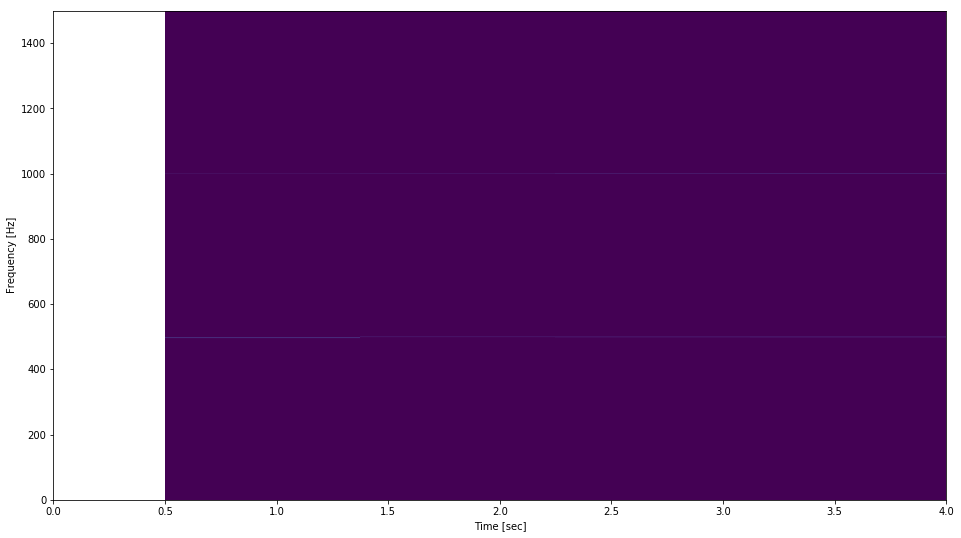

In [15]:
#for x in range(0, 601, 200):
plt.figure(figsize=(16,9))
plt.pcolormesh(time_guitar, freq_guitar, spectrogram_guitar)
# plt.imshow(spectrogram_guitar)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yticks(freq_guitar)
#plt.xticks(time_guitar)
plt.xlim(0,time_guitar[-1])
plt.ylim(0,1500)
colors.LogNorm(vmin = 10000, vmax = 11000)
#plt.xlim(x,x+200)
plt.gca().set_aspect('auto')
plt.show()

In [13]:
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=44100)

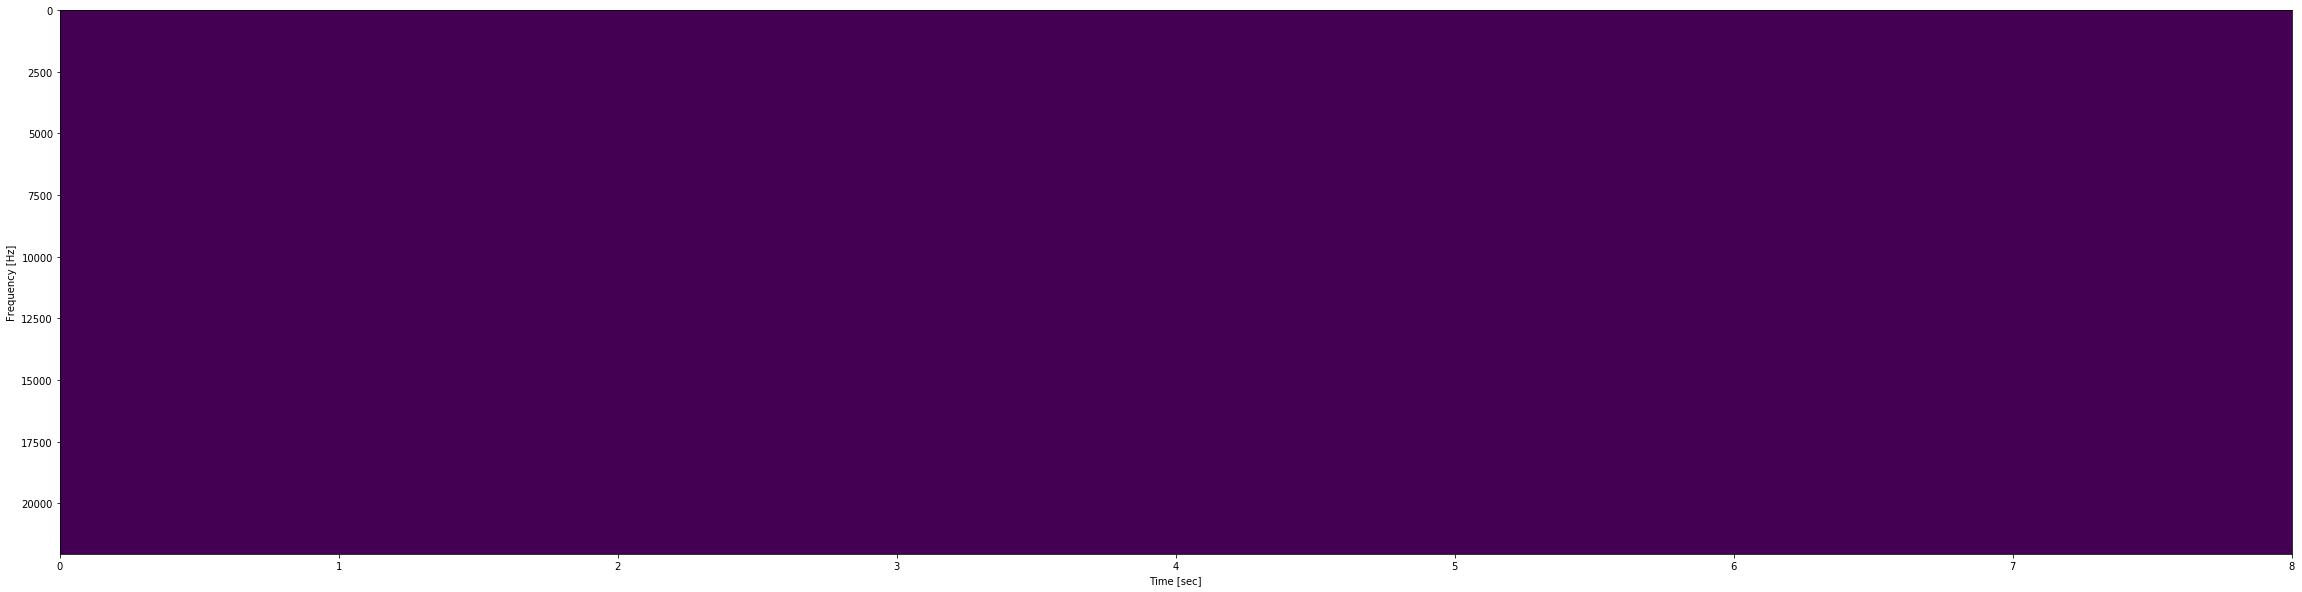

In [88]:
# for x in range(0, 601, 200):

plt.figure(figsize=(40,10))
plt.pcolormesh(time_bells, freq_bells, spectrogram_bells)
plt.imshow(spectrogram_bells)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.ylim(0, 40)
#     plt.xlim(x,x+200)
plt.xlim(0, 8)
plt.gca().set_aspect('auto')
plt.show()

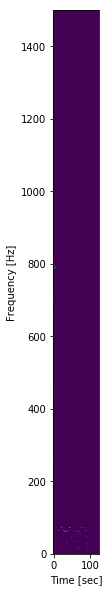

In [56]:
# for x in range(0, 801, 200):

plt.figure(figsize=(40,10))
plt.pcolormesh(time_piano, freq_piano, spectrogram_piano)
plt.imshow(spectrogram_piano)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(0,time_piano[-1])
plt.ylim(0,1500)
#plt.ylim(0, 40)
# plt.xlim(x,x+200)
#plt.xlim(0,200)
plt.show()

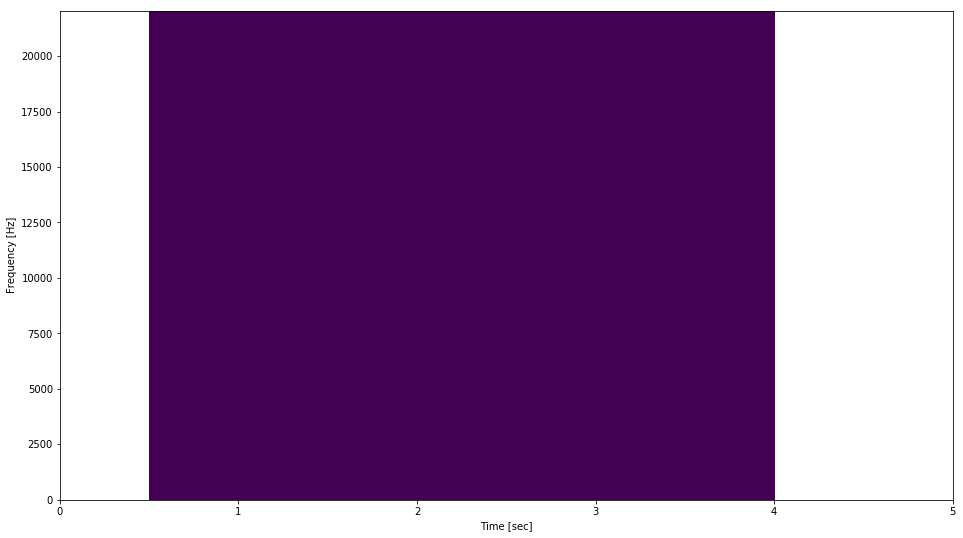

In [14]:
#for x in range(0, 601, 200):
plt.figure(figsize=(16,9))
plt.pcolormesh(time_guitar, freq_guitar, spectrogram_guitar)
# plt.imshow(spectrogram_guitar)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yticks(freq_guitar)
#plt.xticks(time_guitar)
plt.xlim(0,5)
# plt.ylim(0,1500)
#plt.xlim(x,x+200)
plt.gca().set_aspect('auto')
plt.show()

In [60]:
len(spectrogram_guitar)

2049

In [61]:
len(freq_guitar)

2049

In [69]:
spectrogram_guitar.argmax()

2673

In [76]:
spectrogram_guitar[:,3].argmax()

4

In [62]:
spectrogram_guitar[(3,6,12,24),100]

IndexError: index 100 is out of bounds for axis 1 with size 58

In [63]:
time_guitar[75], time_guitar[76]

IndexError: index 75 is out of bounds for axis 0 with size 58

In [64]:
fs_guitar

44100

In [65]:
freq_guitar[3]

32.2998046875

In [66]:
spectrogram_guitar[:,100].argmax()

IndexError: index 100 is out of bounds for axis 1 with size 58

In [67]:
plt.scatter(freq_guitar, spectrogram_guitar[:,100])
plt.show()

IndexError: index 100 is out of bounds for axis 1 with size 58

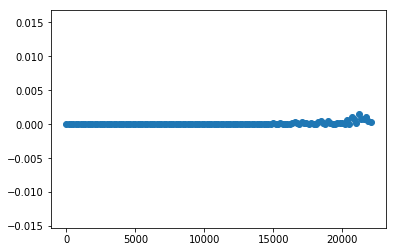

In [23]:
plt.scatter(freq_guitar, spectrogram_guitar[:,0])
plt.show()

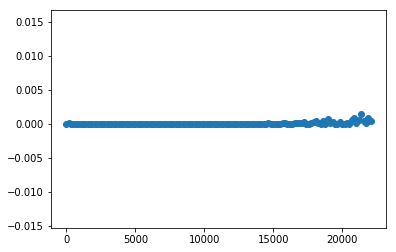

In [24]:
plt.scatter(freq_guitar, spectrogram_guitar[:,1])
plt.show()

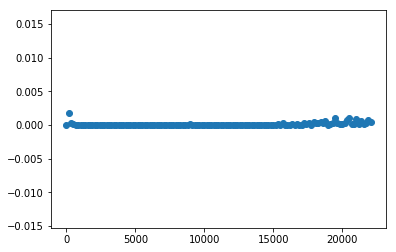

In [25]:
plt.scatter(freq_guitar, spectrogram_guitar[:,2])
plt.show()

In [26]:
time_guitar[-1]

4.7267120181405895

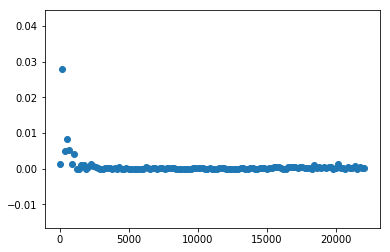

In [27]:
plt.scatter(freq_bells, spectrogram_bells[:,0])
plt.show()

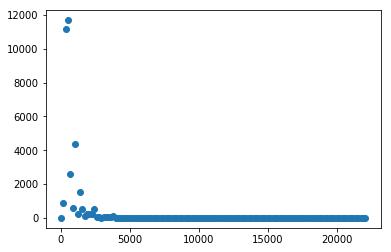

In [28]:
plt.scatter(freq_piano, spectrogram_piano[:,0])
plt.show()

## Normal Processing

In [29]:
# Break the wave data at periods of silence
def zero_runs(a, min_len=0):
    # Runs start and end where absdiff is 1.
    absdiff = np.abs(np.diff(np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))))
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    if min_len != 0:
        ranges = np.delete(ranges, np.where((ranges[:,1] - ranges[:,0]) < min_len), 0)
    return ranges

In [30]:
zr = zero_runs(wav, 0.1 * fs) # get all runs of zeros that are at least 0.1 milliseconds long
nzr = zr.ravel()[1:-1].reshape(-1, 2) # convert zero runs into non-zero runs
nzr = np.vstack(([0, zr[0,0]], nzr)) # the above method misses the first non-zero stretch
groups = [wav[start:stop] for start,stop in nzr]

NameError: name 'wav' is not defined

In [ ]:
zr2 = zero_runs(wav2, 0.1 * fs) # get all runs of zeros that are at least 0.1 milliseconds long
nzr2 = zr2.ravel()[1:-1].reshape(-1, 2) # convert zero runs into non-zero runs
nzr2 = np.vstack(([0, zr2[0,0]], nzr2)) # the above method misses the first non-zero stretch
groups2 = [wav2[start:stop] for start,stop in nzr2]

In [ ]:
print(groups2)

In [ ]:
print(wav)

In [ ]:
# Plot the first 15 groups just to see how it lines up. The colored lines are the telephone number frequencies.
plt.figure(figsize=(16,9))
g = groups[0]
data = (2/(10000*len(g))) * np.abs(rfft(g))
data[data < .25] = 0
#     plt.plot(np.linspace(0.0, fs/2, len(g)), data, color='black')
f, t, Sxx = spectrogram(wav, fs)
# plt.gray()
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Practice Example

In [ ]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
freq = np.linspace(1e3, 2e3, N)
x = amp * np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [ ]:
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
print(x)

In [ ]:
print(f)

In [ ]:
print(t)